# Notebook for Development

This notebook replicates what was alrady done in [the previous example](https://github.com/WatChMaL/ExampleNotebooks/blob/master/HKML%20CNN%20Image%20Classification.ipynb) but using functions in the `classification` module. There is no new ML example here. The purpose of this notebook is to make the whole thing short and concise, so that you can use this as a testbed to develop different networks more easily.

In [1]:
from __future__ import print_function
from IPython.display import display
import torch, time
import numpy as np
%matplotlib inline

## Defining a network
Let us define the same network as the [the previous example](https://github.com/WatChMaL/ExampleNotebooks/blob/master/HKML%20CNN%20Image%20Classification.ipynb).

In [2]:
import sys
sys.path.insert(0, 'hkml_resnet/')
from hkml_resnet import ResNet

## Preparing a _blob_

In [3]:
class BLOB:
    pass
blob=BLOB()
blob.net       = ResNet(3,2,16,[2,2,2,2,2]).cuda() # construct Lenet for 3 class classification, use GPU
blob.criterion = torch.nn.CrossEntropyLoss() # use softmax loss to define an error
blob.optimizer = torch.optim.Adam(blob.net.parameters(),weight_decay=0.001) # use Adam optimizer algorithm
blob.softmax   = torch.nn.Softmax(dim=1) # not for training, but softmax score for each class
blob.data      = None # data for training/analysis
blob.label     = None # label for training/analysis

# Create data loader
import sys
sys.path.insert(0, 'iotools/')
from iotools import loader_factory
DATA_DIRS=['../data/hkml_data/IWCDgrid/varyE/e-','../data/hkml_data/IWCDgrid/varyE/mu-','../data/hkml_data/IWCDgrid/varyE/gamma']
# for train
blob.train_loader=loader_factory('H5Dataset', batch_size=64, shuffle=True, num_workers=4, data_dirs=DATA_DIRS, flavour='100k.h5', start_fraction=0.0, use_fraction=0.2)
# for validation
blob.test_loader=loader_factory('H5Dataset', batch_size=200, shuffle=True, num_workers=2, data_dirs=DATA_DIRS, flavour='100k.h5', start_fraction=0.1, use_fraction=0.1)

# Create & attach data recording utility (into csv file)
import sys
sys.path.insert(0, 'utils/')
from utils import CSVData
blob.train_log, blob.test_log = CSVData('log_train.csv'), CSVData('log_test.csv')

## Running a train loop 

In [4]:
import sys
sys.path.insert(0, 'classification/')
from classification import train_loop
train_loop(blob,3.0)

Epoch 0 Starting @ 2020-04-14 19:03:55


Epoch 1 Starting @ 2020-04-14 19:12:41


Epoch 2 Starting @ 2020-04-14 19:21:45


## Inspecting the training process

In [5]:
torch.cuda.empty_cache()

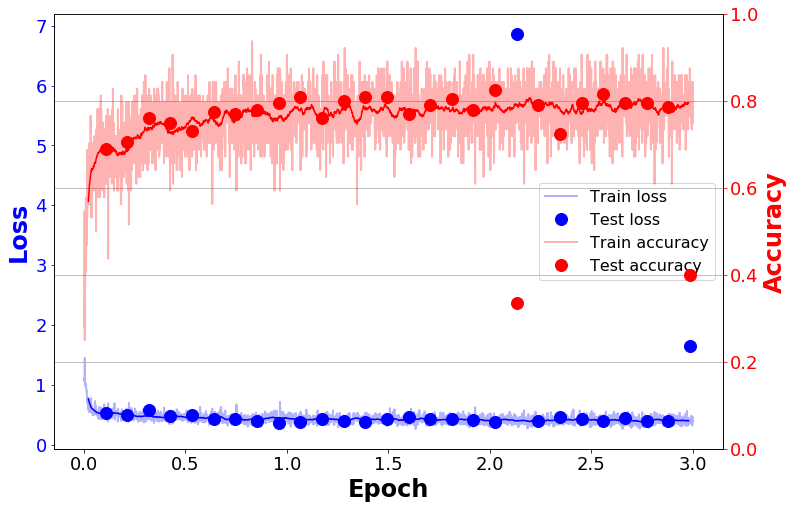

In [6]:
from classification import plot_log
plot_log(blob.train_log.name,blob.test_log.name)

## Performance Analysis

In [7]:
from classification import inference
accuracy,label,prediction = inference(blob,blob.test_loader)
print('Accuracy mean',accuracy.mean(),'std',accuracy.std())

RuntimeError: CUDA out of memory. Tried to allocate 182.00 MiB (GPU 0; 1.96 GiB total capacity; 1014.87 MiB already allocated; 68.19 MiB free; 25.13 MiB cached)

Plot the confusion matrix

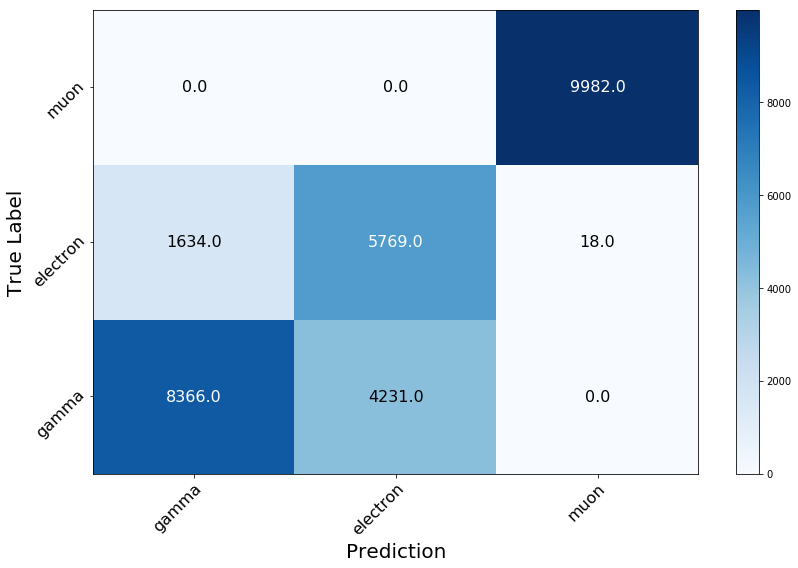

In [7]:
from utils import plot_confusion_matrix
plot_confusion_matrix(label,prediction,['gamma','electron','muon'])